In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
x_true = dataset.iloc[:,1:2].values
y_true = dataset.iloc[:,2].values
N = np.size(x_true)

x_true.shape,y_true.shape,N

((10, 1), (10,), 10)

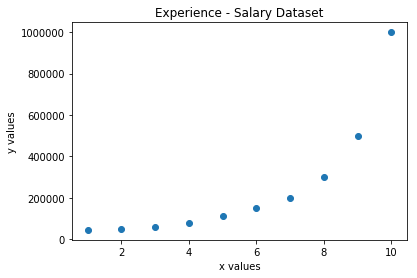

In [3]:
# Plotting the training data
plt.scatter(x_true,y_true)
plt.title("Experience - Salary Dataset")
plt.xlabel("x values")
plt.ylabel("y values")
plt.savefig("train_data")
plt.show()

In [4]:
# Normalize the training data
x_mean = x_true.mean()
x_std = x_true.std()

y_mean = y_true.mean()
y_std = y_true.std()

x_normal = (x_true - x_mean) / x_std
y_normal = (y_true - y_mean) / y_std

x_normal.shape,y_normal.shape

((10, 1), (10,))

In [5]:
# Placeholders
with tf.name_scope("placeholders"):
    x = tf.placeholder(tf.float32,(N,1))
    y = tf.placeholder(tf.float32,(N,))
x,y

(<tf.Tensor 'placeholders/Placeholder:0' shape=(10, 1) dtype=float32>,
 <tf.Tensor 'placeholders/Placeholder_1:0' shape=(10,) dtype=float32>)

In [6]:
# Weights --> a,b,c,d,e
with tf.name_scope("weights"):
    a = tf.Variable(tf.random_normal((1,1)))
    b = tf.Variable(tf.random_normal((1,1)))
    c = tf.Variable(tf.random_normal((1,1)))
    d = tf.Variable(tf.random_normal((1,1)))
    e = tf.Variable(tf.random_normal((1,)))
a,b,c,d,e

(<tf.Variable 'weights/Variable:0' shape=(1, 1) dtype=float32_ref>,
 <tf.Variable 'weights/Variable_1:0' shape=(1, 1) dtype=float32_ref>,
 <tf.Variable 'weights/Variable_2:0' shape=(1, 1) dtype=float32_ref>,
 <tf.Variable 'weights/Variable_3:0' shape=(1, 1) dtype=float32_ref>,
 <tf.Variable 'weights/Variable_4:0' shape=(1,) dtype=float32_ref>)

In [7]:
# y = a*x**4 + b*x**3 + c*x**2 + d*x + e
with tf.name_scope("prediction"):
    y_pred = tf.matmul(x**4,a) + tf.matmul(x**3,b) + tf.matmul(x**2,c) + tf.matmul(x,d) + e
y_pred

<tf.Tensor 'prediction/add_3:0' shape=(10, 1) dtype=float32>

In [8]:
# Squared error --> (y - y_pred) ** 2
with tf.name_scope("loss"):
    l = tf.reduce_sum((y - tf.squeeze(y_pred))**2)
l

<tf.Tensor 'loss/Sum:0' shape=() dtype=float32>

In [9]:
# Adam Optimizer minimizing the squared error
with tf.name_scope("optim"):
    train_op = tf.train.AdamOptimizer(.001).minimize(l)
train_op

<tf.Operation 'optim/Adam' type=NoOp>

In [10]:
with tf.name_scope("summaries"):
    tf.summary.scalar("loss",l)
    merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('/tensor_flow/linear_regression', tf.get_default_graph())
train_writer

In [11]:
iteration = 10000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Training the model
    for i in range(iteration):
        feed_dict = {x:x_normal,y:y_normal}
        _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
        print("step %d, loss: %f" % (i, loss))
        train_writer.add_summary(summary, i)

    # Get weights
    a,b,c,d,e = sess.run([a,b,c,d,e])
    
    # Make Predictions
    y_pred_final = sess.run(y_pred, feed_dict={x: x_normal})

step 0, loss: 119.233170
step 1, loss: 118.929962
step 2, loss: 118.627396
step 3, loss: 118.325500
step 4, loss: 118.024315
step 5, loss: 117.723816
step 6, loss: 117.424011
step 7, loss: 117.124924
step 8, loss: 116.826553
step 9, loss: 116.528931
step 10, loss: 116.232056
step 11, loss: 115.935921
step 12, loss: 115.640549
step 13, loss: 115.345978
step 14, loss: 115.052162
step 15, loss: 114.759109
step 16, loss: 114.466866
step 17, loss: 114.175430
step 18, loss: 113.884781
step 19, loss: 113.594925
step 20, loss: 113.305893
step 21, loss: 113.017693
step 22, loss: 112.730270
step 23, loss: 112.443741
step 24, loss: 112.158005
step 25, loss: 111.873077
step 26, loss: 111.588982
step 27, loss: 111.305740
step 28, loss: 111.023308
step 29, loss: 110.741707
step 30, loss: 110.460938
step 31, loss: 110.181000
step 32, loss: 109.901917
step 33, loss: 109.623627
step 34, loss: 109.346161
step 35, loss: 109.069534
step 36, loss: 108.793716
step 37, loss: 108.518723
step 38, loss: 108.244

step 470, loss: 34.016178
step 471, loss: 33.919472
step 472, loss: 33.823017
step 473, loss: 33.726814
step 474, loss: 33.630875
step 475, loss: 33.535183
step 476, loss: 33.439747
step 477, loss: 33.344559
step 478, loss: 33.249619
step 479, loss: 33.154934
step 480, loss: 33.060501
step 481, loss: 32.966316
step 482, loss: 32.872375
step 483, loss: 32.778687
step 484, loss: 32.685249
step 485, loss: 32.592060
step 486, loss: 32.499111
step 487, loss: 32.406414
step 488, loss: 32.313957
step 489, loss: 32.221748
step 490, loss: 32.129787
step 491, loss: 32.038071
step 492, loss: 31.946594
step 493, loss: 31.855362
step 494, loss: 31.764370
step 495, loss: 31.673626
step 496, loss: 31.583111
step 497, loss: 31.492846
step 498, loss: 31.402824
step 499, loss: 31.313036
step 500, loss: 31.223494
step 501, loss: 31.134186
step 502, loss: 31.045109
step 503, loss: 30.956280
step 504, loss: 30.867689
step 505, loss: 30.779327
step 506, loss: 30.691208
step 507, loss: 30.603321
step 508, lo

step 934, loss: 8.777322
step 935, loss: 8.751865
step 936, loss: 8.726489
step 937, loss: 8.701189
step 938, loss: 8.675969
step 939, loss: 8.650826
step 940, loss: 8.625760
step 941, loss: 8.600774
step 942, loss: 8.575863
step 943, loss: 8.551030
step 944, loss: 8.526274
step 945, loss: 8.501593
step 946, loss: 8.476992
step 947, loss: 8.452464
step 948, loss: 8.428015
step 949, loss: 8.403641
step 950, loss: 8.379341
step 951, loss: 8.355120
step 952, loss: 8.330971
step 953, loss: 8.306896
step 954, loss: 8.282898
step 955, loss: 8.258974
step 956, loss: 8.235124
step 957, loss: 8.211349
step 958, loss: 8.187646
step 959, loss: 8.164017
step 960, loss: 8.140463
step 961, loss: 8.116982
step 962, loss: 8.093574
step 963, loss: 8.070237
step 964, loss: 8.046973
step 965, loss: 8.023784
step 966, loss: 8.000666
step 967, loss: 7.977620
step 968, loss: 7.954645
step 969, loss: 7.931743
step 970, loss: 7.908913
step 971, loss: 7.886152
step 972, loss: 7.863463
step 973, loss: 7.840846


step 1382, loss: 2.690752
step 1383, loss: 2.684753
step 1384, loss: 2.678771
step 1385, loss: 2.672810
step 1386, loss: 2.666870
step 1387, loss: 2.660948
step 1388, loss: 2.655046
step 1389, loss: 2.649162
step 1390, loss: 2.643299
step 1391, loss: 2.637455
step 1392, loss: 2.631629
step 1393, loss: 2.625824
step 1394, loss: 2.620037
step 1395, loss: 2.614269
step 1396, loss: 2.608520
step 1397, loss: 2.602790
step 1398, loss: 2.597079
step 1399, loss: 2.591387
step 1400, loss: 2.585712
step 1401, loss: 2.580057
step 1402, loss: 2.574421
step 1403, loss: 2.568803
step 1404, loss: 2.563204
step 1405, loss: 2.557622
step 1406, loss: 2.552059
step 1407, loss: 2.546515
step 1408, loss: 2.540987
step 1409, loss: 2.535480
step 1410, loss: 2.529990
step 1411, loss: 2.524517
step 1412, loss: 2.519063
step 1413, loss: 2.513627
step 1414, loss: 2.508209
step 1415, loss: 2.502808
step 1416, loss: 2.497425
step 1417, loss: 2.492059
step 1418, loss: 2.486712
step 1419, loss: 2.481381
step 1420, l

step 1719, loss: 1.464620
step 1720, loss: 1.462622
step 1721, loss: 1.460630
step 1722, loss: 1.458644
step 1723, loss: 1.456666
step 1724, loss: 1.454693
step 1725, loss: 1.452726
step 1726, loss: 1.450766
step 1727, loss: 1.448812
step 1728, loss: 1.446864
step 1729, loss: 1.444924
step 1730, loss: 1.442989
step 1731, loss: 1.441059
step 1732, loss: 1.439137
step 1733, loss: 1.437221
step 1734, loss: 1.435310
step 1735, loss: 1.433405
step 1736, loss: 1.431508
step 1737, loss: 1.429615
step 1738, loss: 1.427730
step 1739, loss: 1.425849
step 1740, loss: 1.423976
step 1741, loss: 1.422108
step 1742, loss: 1.420246
step 1743, loss: 1.418390
step 1744, loss: 1.416540
step 1745, loss: 1.414696
step 1746, loss: 1.412858
step 1747, loss: 1.411025
step 1748, loss: 1.409199
step 1749, loss: 1.407378
step 1750, loss: 1.405564
step 1751, loss: 1.403755
step 1752, loss: 1.401951
step 1753, loss: 1.400154
step 1754, loss: 1.398362
step 1755, loss: 1.396577
step 1756, loss: 1.394796
step 1757, l

step 2079, loss: 1.034347
step 2080, loss: 1.033692
step 2081, loss: 1.033039
step 2082, loss: 1.032389
step 2083, loss: 1.031740
step 2084, loss: 1.031093
step 2085, loss: 1.030448
step 2086, loss: 1.029804
step 2087, loss: 1.029163
step 2088, loss: 1.028524
step 2089, loss: 1.027886
step 2090, loss: 1.027250
step 2091, loss: 1.026615
step 2092, loss: 1.025983
step 2093, loss: 1.025353
step 2094, loss: 1.024724
step 2095, loss: 1.024097
step 2096, loss: 1.023472
step 2097, loss: 1.022848
step 2098, loss: 1.022227
step 2099, loss: 1.021607
step 2100, loss: 1.020989
step 2101, loss: 1.020372
step 2102, loss: 1.019758
step 2103, loss: 1.019145
step 2104, loss: 1.018534
step 2105, loss: 1.017925
step 2106, loss: 1.017317
step 2107, loss: 1.016711
step 2108, loss: 1.016107
step 2109, loss: 1.015505
step 2110, loss: 1.014904
step 2111, loss: 1.014305
step 2112, loss: 1.013707
step 2113, loss: 1.013111
step 2114, loss: 1.012517
step 2115, loss: 1.011925
step 2116, loss: 1.011334
step 2117, l

step 2481, loss: 0.868557
step 2482, loss: 0.868287
step 2483, loss: 0.868018
step 2484, loss: 0.867748
step 2485, loss: 0.867480
step 2486, loss: 0.867211
step 2487, loss: 0.866944
step 2488, loss: 0.866675
step 2489, loss: 0.866408
step 2490, loss: 0.866141
step 2491, loss: 0.865874
step 2492, loss: 0.865608
step 2493, loss: 0.865342
step 2494, loss: 0.865076
step 2495, loss: 0.864811
step 2496, loss: 0.864545
step 2497, loss: 0.864281
step 2498, loss: 0.864016
step 2499, loss: 0.863752
step 2500, loss: 0.863488
step 2501, loss: 0.863225
step 2502, loss: 0.862962
step 2503, loss: 0.862699
step 2504, loss: 0.862436
step 2505, loss: 0.862174
step 2506, loss: 0.861912
step 2507, loss: 0.861651
step 2508, loss: 0.861389
step 2509, loss: 0.861128
step 2510, loss: 0.860868
step 2511, loss: 0.860607
step 2512, loss: 0.860347
step 2513, loss: 0.860088
step 2514, loss: 0.859828
step 2515, loss: 0.859569
step 2516, loss: 0.859310
step 2517, loss: 0.859051
step 2518, loss: 0.858793
step 2519, l

step 2888, loss: 0.773914
step 2889, loss: 0.773696
step 2890, loss: 0.773478
step 2891, loss: 0.773260
step 2892, loss: 0.773043
step 2893, loss: 0.772825
step 2894, loss: 0.772607
step 2895, loss: 0.772389
step 2896, loss: 0.772171
step 2897, loss: 0.771953
step 2898, loss: 0.771736
step 2899, loss: 0.771518
step 2900, loss: 0.771300
step 2901, loss: 0.771082
step 2902, loss: 0.770865
step 2903, loss: 0.770647
step 2904, loss: 0.770429
step 2905, loss: 0.770211
step 2906, loss: 0.769993
step 2907, loss: 0.769776
step 2908, loss: 0.769557
step 2909, loss: 0.769340
step 2910, loss: 0.769122
step 2911, loss: 0.768904
step 2912, loss: 0.768686
step 2913, loss: 0.768468
step 2914, loss: 0.768251
step 2915, loss: 0.768033
step 2916, loss: 0.767815
step 2917, loss: 0.767597
step 2918, loss: 0.767379
step 2919, loss: 0.767161
step 2920, loss: 0.766944
step 2921, loss: 0.766726
step 2922, loss: 0.766508
step 2923, loss: 0.766290
step 2924, loss: 0.766072
step 2925, loss: 0.765854
step 2926, l

step 3299, loss: 0.682843
step 3300, loss: 0.682615
step 3301, loss: 0.682388
step 3302, loss: 0.682161
step 3303, loss: 0.681933
step 3304, loss: 0.681705
step 3305, loss: 0.681478
step 3306, loss: 0.681250
step 3307, loss: 0.681022
step 3308, loss: 0.680794
step 3309, loss: 0.680567
step 3310, loss: 0.680339
step 3311, loss: 0.680111
step 3312, loss: 0.679883
step 3313, loss: 0.679655
step 3314, loss: 0.679427
step 3315, loss: 0.679199
step 3316, loss: 0.678971
step 3317, loss: 0.678743
step 3318, loss: 0.678515
step 3319, loss: 0.678287
step 3320, loss: 0.678059
step 3321, loss: 0.677831
step 3322, loss: 0.677603
step 3323, loss: 0.677375
step 3324, loss: 0.677146
step 3325, loss: 0.676918
step 3326, loss: 0.676689
step 3327, loss: 0.676461
step 3328, loss: 0.676233
step 3329, loss: 0.676004
step 3330, loss: 0.675776
step 3331, loss: 0.675547
step 3332, loss: 0.675319
step 3333, loss: 0.675090
step 3334, loss: 0.674862
step 3335, loss: 0.674633
step 3336, loss: 0.674405
step 3337, l

step 3675, loss: 0.595330
step 3676, loss: 0.595093
step 3677, loss: 0.594856
step 3678, loss: 0.594619
step 3679, loss: 0.594382
step 3680, loss: 0.594145
step 3681, loss: 0.593908
step 3682, loss: 0.593670
step 3683, loss: 0.593433
step 3684, loss: 0.593196
step 3685, loss: 0.592959
step 3686, loss: 0.592722
step 3687, loss: 0.592484
step 3688, loss: 0.592247
step 3689, loss: 0.592009
step 3690, loss: 0.591772
step 3691, loss: 0.591535
step 3692, loss: 0.591297
step 3693, loss: 0.591060
step 3694, loss: 0.590823
step 3695, loss: 0.590585
step 3696, loss: 0.590348
step 3697, loss: 0.590111
step 3698, loss: 0.589873
step 3699, loss: 0.589635
step 3700, loss: 0.589398
step 3701, loss: 0.589160
step 3702, loss: 0.588923
step 3703, loss: 0.588685
step 3704, loss: 0.588448
step 3705, loss: 0.588210
step 3706, loss: 0.587973
step 3707, loss: 0.587735
step 3708, loss: 0.587497
step 3709, loss: 0.587260
step 3710, loss: 0.587022
step 3711, loss: 0.586784
step 3712, loss: 0.586547
step 3713, l

step 4039, loss: 0.508325
step 4040, loss: 0.508085
step 4041, loss: 0.507846
step 4042, loss: 0.507606
step 4043, loss: 0.507366
step 4044, loss: 0.507127
step 4045, loss: 0.506887
step 4046, loss: 0.506648
step 4047, loss: 0.506408
step 4048, loss: 0.506168
step 4049, loss: 0.505928
step 4050, loss: 0.505689
step 4051, loss: 0.505449
step 4052, loss: 0.505209
step 4053, loss: 0.504970
step 4054, loss: 0.504730
step 4055, loss: 0.504491
step 4056, loss: 0.504251
step 4057, loss: 0.504011
step 4058, loss: 0.503772
step 4059, loss: 0.503532
step 4060, loss: 0.503292
step 4061, loss: 0.503053
step 4062, loss: 0.502813
step 4063, loss: 0.502573
step 4064, loss: 0.502334
step 4065, loss: 0.502094
step 4066, loss: 0.501855
step 4067, loss: 0.501615
step 4068, loss: 0.501376
step 4069, loss: 0.501136
step 4070, loss: 0.500896
step 4071, loss: 0.500657
step 4072, loss: 0.500417
step 4073, loss: 0.500178
step 4074, loss: 0.499938
step 4075, loss: 0.499699
step 4076, loss: 0.499459
step 4077, l

step 4399, loss: 0.422758
step 4400, loss: 0.422523
step 4401, loss: 0.422289
step 4402, loss: 0.422055
step 4403, loss: 0.421821
step 4404, loss: 0.421587
step 4405, loss: 0.421353
step 4406, loss: 0.421118
step 4407, loss: 0.420884
step 4408, loss: 0.420650
step 4409, loss: 0.420416
step 4410, loss: 0.420182
step 4411, loss: 0.419948
step 4412, loss: 0.419714
step 4413, loss: 0.419480
step 4414, loss: 0.419247
step 4415, loss: 0.419013
step 4416, loss: 0.418779
step 4417, loss: 0.418545
step 4418, loss: 0.418311
step 4419, loss: 0.418078
step 4420, loss: 0.417844
step 4421, loss: 0.417610
step 4422, loss: 0.417377
step 4423, loss: 0.417143
step 4424, loss: 0.416909
step 4425, loss: 0.416676
step 4426, loss: 0.416442
step 4427, loss: 0.416209
step 4428, loss: 0.415975
step 4429, loss: 0.415742
step 4430, loss: 0.415508
step 4431, loss: 0.415275
step 4432, loss: 0.415042
step 4433, loss: 0.414808
step 4434, loss: 0.414575
step 4435, loss: 0.414342
step 4436, loss: 0.414109
step 4437, l

step 4753, loss: 0.341995
step 4754, loss: 0.341774
step 4755, loss: 0.341554
step 4756, loss: 0.341333
step 4757, loss: 0.341113
step 4758, loss: 0.340892
step 4759, loss: 0.340672
step 4760, loss: 0.340452
step 4761, loss: 0.340231
step 4762, loss: 0.340011
step 4763, loss: 0.339791
step 4764, loss: 0.339571
step 4765, loss: 0.339351
step 4766, loss: 0.339131
step 4767, loss: 0.338911
step 4768, loss: 0.338691
step 4769, loss: 0.338471
step 4770, loss: 0.338251
step 4771, loss: 0.338032
step 4772, loss: 0.337812
step 4773, loss: 0.337592
step 4774, loss: 0.337373
step 4775, loss: 0.337153
step 4776, loss: 0.336934
step 4777, loss: 0.336714
step 4778, loss: 0.336495
step 4779, loss: 0.336276
step 4780, loss: 0.336056
step 4781, loss: 0.335837
step 4782, loss: 0.335618
step 4783, loss: 0.335399
step 4784, loss: 0.335180
step 4785, loss: 0.334961
step 4786, loss: 0.334742
step 4787, loss: 0.334523
step 4788, loss: 0.334304
step 4789, loss: 0.334085
step 4790, loss: 0.333866
step 4791, l

step 5147, loss: 0.259573
step 5148, loss: 0.259377
step 5149, loss: 0.259181
step 5150, loss: 0.258984
step 5151, loss: 0.258789
step 5152, loss: 0.258593
step 5153, loss: 0.258397
step 5154, loss: 0.258201
step 5155, loss: 0.258005
step 5156, loss: 0.257810
step 5157, loss: 0.257614
step 5158, loss: 0.257419
step 5159, loss: 0.257223
step 5160, loss: 0.257028
step 5161, loss: 0.256833
step 5162, loss: 0.256638
step 5163, loss: 0.256442
step 5164, loss: 0.256247
step 5165, loss: 0.256052
step 5166, loss: 0.255858
step 5167, loss: 0.255663
step 5168, loss: 0.255468
step 5169, loss: 0.255273
step 5170, loss: 0.255079
step 5171, loss: 0.254884
step 5172, loss: 0.254690
step 5173, loss: 0.254495
step 5174, loss: 0.254301
step 5175, loss: 0.254107
step 5176, loss: 0.253913
step 5177, loss: 0.253719
step 5178, loss: 0.253525
step 5179, loss: 0.253331
step 5180, loss: 0.253137
step 5181, loss: 0.252943
step 5182, loss: 0.252750
step 5183, loss: 0.252556
step 5184, loss: 0.252362
step 5185, l

step 5554, loss: 0.186261
step 5555, loss: 0.186098
step 5556, loss: 0.185936
step 5557, loss: 0.185773
step 5558, loss: 0.185610
step 5559, loss: 0.185448
step 5560, loss: 0.185285
step 5561, loss: 0.185123
step 5562, loss: 0.184961
step 5563, loss: 0.184799
step 5564, loss: 0.184637
step 5565, loss: 0.184475
step 5566, loss: 0.184313
step 5567, loss: 0.184151
step 5568, loss: 0.183989
step 5569, loss: 0.183828
step 5570, loss: 0.183666
step 5571, loss: 0.183505
step 5572, loss: 0.183344
step 5573, loss: 0.183182
step 5574, loss: 0.183021
step 5575, loss: 0.182860
step 5576, loss: 0.182699
step 5577, loss: 0.182538
step 5578, loss: 0.182377
step 5579, loss: 0.182217
step 5580, loss: 0.182056
step 5581, loss: 0.181896
step 5582, loss: 0.181735
step 5583, loss: 0.181575
step 5584, loss: 0.181415
step 5585, loss: 0.181254
step 5586, loss: 0.181095
step 5587, loss: 0.180934
step 5588, loss: 0.180774
step 5589, loss: 0.180615
step 5590, loss: 0.180455
step 5591, loss: 0.180295
step 5592, l

step 5872, loss: 0.139098
step 5873, loss: 0.138964
step 5874, loss: 0.138831
step 5875, loss: 0.138698
step 5876, loss: 0.138565
step 5877, loss: 0.138432
step 5878, loss: 0.138299
step 5879, loss: 0.138166
step 5880, loss: 0.138033
step 5881, loss: 0.137900
step 5882, loss: 0.137768
step 5883, loss: 0.137635
step 5884, loss: 0.137503
step 5885, loss: 0.137371
step 5886, loss: 0.137239
step 5887, loss: 0.137107
step 5888, loss: 0.136975
step 5889, loss: 0.136843
step 5890, loss: 0.136711
step 5891, loss: 0.136579
step 5892, loss: 0.136448
step 5893, loss: 0.136316
step 5894, loss: 0.136185
step 5895, loss: 0.136054
step 5896, loss: 0.135922
step 5897, loss: 0.135791
step 5898, loss: 0.135660
step 5899, loss: 0.135529
step 5900, loss: 0.135398
step 5901, loss: 0.135268
step 5902, loss: 0.135137
step 5903, loss: 0.135007
step 5904, loss: 0.134876
step 5905, loss: 0.134746
step 5906, loss: 0.134615
step 5907, loss: 0.134485
step 5908, loss: 0.134355
step 5909, loss: 0.134225
step 5910, l

step 6194, loss: 0.101040
step 6195, loss: 0.100937
step 6196, loss: 0.100834
step 6197, loss: 0.100731
step 6198, loss: 0.100628
step 6199, loss: 0.100526
step 6200, loss: 0.100423
step 6201, loss: 0.100321
step 6202, loss: 0.100218
step 6203, loss: 0.100116
step 6204, loss: 0.100014
step 6205, loss: 0.099912
step 6206, loss: 0.099810
step 6207, loss: 0.099708
step 6208, loss: 0.099606
step 6209, loss: 0.099504
step 6210, loss: 0.099403
step 6211, loss: 0.099301
step 6212, loss: 0.099200
step 6213, loss: 0.099098
step 6214, loss: 0.098997
step 6215, loss: 0.098896
step 6216, loss: 0.098795
step 6217, loss: 0.098694
step 6218, loss: 0.098593
step 6219, loss: 0.098492
step 6220, loss: 0.098392
step 6221, loss: 0.098291
step 6222, loss: 0.098191
step 6223, loss: 0.098090
step 6224, loss: 0.097990
step 6225, loss: 0.097890
step 6226, loss: 0.097789
step 6227, loss: 0.097689
step 6228, loss: 0.097589
step 6229, loss: 0.097490
step 6230, loss: 0.097390
step 6231, loss: 0.097290
step 6232, l

step 6574, loss: 0.068356
step 6575, loss: 0.068287
step 6576, loss: 0.068217
step 6577, loss: 0.068148
step 6578, loss: 0.068078
step 6579, loss: 0.068009
step 6580, loss: 0.067940
step 6581, loss: 0.067870
step 6582, loss: 0.067801
step 6583, loss: 0.067732
step 6584, loss: 0.067663
step 6585, loss: 0.067595
step 6586, loss: 0.067526
step 6587, loss: 0.067457
step 6588, loss: 0.067389
step 6589, loss: 0.067320
step 6590, loss: 0.067251
step 6591, loss: 0.067183
step 6592, loss: 0.067115
step 6593, loss: 0.067047
step 6594, loss: 0.066979
step 6595, loss: 0.066911
step 6596, loss: 0.066843
step 6597, loss: 0.066775
step 6598, loss: 0.066707
step 6599, loss: 0.066639
step 6600, loss: 0.066572
step 6601, loss: 0.066504
step 6602, loss: 0.066437
step 6603, loss: 0.066369
step 6604, loss: 0.066302
step 6605, loss: 0.066235
step 6606, loss: 0.066167
step 6607, loss: 0.066100
step 6608, loss: 0.066033
step 6609, loss: 0.065967
step 6610, loss: 0.065900
step 6611, loss: 0.065833
step 6612, l

step 6943, loss: 0.047800
step 6944, loss: 0.047758
step 6945, loss: 0.047715
step 6946, loss: 0.047672
step 6947, loss: 0.047630
step 6948, loss: 0.047587
step 6949, loss: 0.047545
step 6950, loss: 0.047502
step 6951, loss: 0.047460
step 6952, loss: 0.047418
step 6953, loss: 0.047375
step 6954, loss: 0.047333
step 6955, loss: 0.047291
step 6956, loss: 0.047249
step 6957, loss: 0.047207
step 6958, loss: 0.047165
step 6959, loss: 0.047123
step 6960, loss: 0.047082
step 6961, loss: 0.047040
step 6962, loss: 0.046998
step 6963, loss: 0.046957
step 6964, loss: 0.046915
step 6965, loss: 0.046874
step 6966, loss: 0.046832
step 6967, loss: 0.046791
step 6968, loss: 0.046750
step 6969, loss: 0.046708
step 6970, loss: 0.046667
step 6971, loss: 0.046626
step 6972, loss: 0.046585
step 6973, loss: 0.046544
step 6974, loss: 0.046503
step 6975, loss: 0.046462
step 6976, loss: 0.046422
step 6977, loss: 0.046381
step 6978, loss: 0.046340
step 6979, loss: 0.046300
step 6980, loss: 0.046259
step 6981, l

step 7333, loss: 0.035386
step 7334, loss: 0.035364
step 7335, loss: 0.035342
step 7336, loss: 0.035320
step 7337, loss: 0.035298
step 7338, loss: 0.035276
step 7339, loss: 0.035254
step 7340, loss: 0.035232
step 7341, loss: 0.035210
step 7342, loss: 0.035188
step 7343, loss: 0.035166
step 7344, loss: 0.035144
step 7345, loss: 0.035123
step 7346, loss: 0.035101
step 7347, loss: 0.035079
step 7348, loss: 0.035058
step 7349, loss: 0.035036
step 7350, loss: 0.035015
step 7351, loss: 0.034993
step 7352, loss: 0.034972
step 7353, loss: 0.034950
step 7354, loss: 0.034929
step 7355, loss: 0.034907
step 7356, loss: 0.034886
step 7357, loss: 0.034865
step 7358, loss: 0.034844
step 7359, loss: 0.034822
step 7360, loss: 0.034801
step 7361, loss: 0.034780
step 7362, loss: 0.034759
step 7363, loss: 0.034738
step 7364, loss: 0.034717
step 7365, loss: 0.034696
step 7366, loss: 0.034675
step 7367, loss: 0.034654
step 7368, loss: 0.034634
step 7369, loss: 0.034613
step 7370, loss: 0.034592
step 7371, l

step 7744, loss: 0.029209
step 7745, loss: 0.029200
step 7746, loss: 0.029190
step 7747, loss: 0.029181
step 7748, loss: 0.029172
step 7749, loss: 0.029163
step 7750, loss: 0.029154
step 7751, loss: 0.029145
step 7752, loss: 0.029136
step 7753, loss: 0.029127
step 7754, loss: 0.029118
step 7755, loss: 0.029109
step 7756, loss: 0.029100
step 7757, loss: 0.029091
step 7758, loss: 0.029082
step 7759, loss: 0.029073
step 7760, loss: 0.029065
step 7761, loss: 0.029056
step 7762, loss: 0.029047
step 7763, loss: 0.029038
step 7764, loss: 0.029029
step 7765, loss: 0.029021
step 7766, loss: 0.029012
step 7767, loss: 0.029003
step 7768, loss: 0.028995
step 7769, loss: 0.028986
step 7770, loss: 0.028977
step 7771, loss: 0.028969
step 7772, loss: 0.028960
step 7773, loss: 0.028952
step 7774, loss: 0.028943
step 7775, loss: 0.028935
step 7776, loss: 0.028926
step 7777, loss: 0.028918
step 7778, loss: 0.028909
step 7779, loss: 0.028901
step 7780, loss: 0.028892
step 7781, loss: 0.028884
step 7782, l

step 8167, loss: 0.026863
step 8168, loss: 0.026860
step 8169, loss: 0.026857
step 8170, loss: 0.026854
step 8171, loss: 0.026851
step 8172, loss: 0.026849
step 8173, loss: 0.026846
step 8174, loss: 0.026843
step 8175, loss: 0.026840
step 8176, loss: 0.026837
step 8177, loss: 0.026835
step 8178, loss: 0.026832
step 8179, loss: 0.026829
step 8180, loss: 0.026826
step 8181, loss: 0.026824
step 8182, loss: 0.026821
step 8183, loss: 0.026818
step 8184, loss: 0.026816
step 8185, loss: 0.026813
step 8186, loss: 0.026810
step 8187, loss: 0.026807
step 8188, loss: 0.026805
step 8189, loss: 0.026802
step 8190, loss: 0.026799
step 8191, loss: 0.026797
step 8192, loss: 0.026794
step 8193, loss: 0.026792
step 8194, loss: 0.026789
step 8195, loss: 0.026786
step 8196, loss: 0.026784
step 8197, loss: 0.026781
step 8198, loss: 0.026778
step 8199, loss: 0.026776
step 8200, loss: 0.026773
step 8201, loss: 0.026771
step 8202, loss: 0.026768
step 8203, loss: 0.026766
step 8204, loss: 0.026763
step 8205, l

step 8505, loss: 0.026283
step 8506, loss: 0.026282
step 8507, loss: 0.026281
step 8508, loss: 0.026280
step 8509, loss: 0.026279
step 8510, loss: 0.026279
step 8511, loss: 0.026278
step 8512, loss: 0.026277
step 8513, loss: 0.026276
step 8514, loss: 0.026275
step 8515, loss: 0.026274
step 8516, loss: 0.026273
step 8517, loss: 0.026273
step 8518, loss: 0.026272
step 8519, loss: 0.026271
step 8520, loss: 0.026270
step 8521, loss: 0.026269
step 8522, loss: 0.026268
step 8523, loss: 0.026268
step 8524, loss: 0.026267
step 8525, loss: 0.026266
step 8526, loss: 0.026265
step 8527, loss: 0.026264
step 8528, loss: 0.026263
step 8529, loss: 0.026263
step 8530, loss: 0.026262
step 8531, loss: 0.026261
step 8532, loss: 0.026260
step 8533, loss: 0.026259
step 8534, loss: 0.026259
step 8535, loss: 0.026258
step 8536, loss: 0.026257
step 8537, loss: 0.026256
step 8538, loss: 0.026255
step 8539, loss: 0.026255
step 8540, loss: 0.026254
step 8541, loss: 0.026253
step 8542, loss: 0.026252
step 8543, l

step 8833, loss: 0.026121
step 8834, loss: 0.026121
step 8835, loss: 0.026121
step 8836, loss: 0.026121
step 8837, loss: 0.026120
step 8838, loss: 0.026120
step 8839, loss: 0.026120
step 8840, loss: 0.026120
step 8841, loss: 0.026119
step 8842, loss: 0.026119
step 8843, loss: 0.026119
step 8844, loss: 0.026119
step 8845, loss: 0.026119
step 8846, loss: 0.026118
step 8847, loss: 0.026118
step 8848, loss: 0.026118
step 8849, loss: 0.026118
step 8850, loss: 0.026118
step 8851, loss: 0.026117
step 8852, loss: 0.026117
step 8853, loss: 0.026117
step 8854, loss: 0.026117
step 8855, loss: 0.026117
step 8856, loss: 0.026116
step 8857, loss: 0.026116
step 8858, loss: 0.026116
step 8859, loss: 0.026116
step 8860, loss: 0.026116
step 8861, loss: 0.026115
step 8862, loss: 0.026115
step 8863, loss: 0.026115
step 8864, loss: 0.026115
step 8865, loss: 0.026115
step 8866, loss: 0.026114
step 8867, loss: 0.026114
step 8868, loss: 0.026114
step 8869, loss: 0.026114
step 8870, loss: 0.026114
step 8871, l

step 9192, loss: 0.026083
step 9193, loss: 0.026083
step 9194, loss: 0.026083
step 9195, loss: 0.026083
step 9196, loss: 0.026083
step 9197, loss: 0.026083
step 9198, loss: 0.026083
step 9199, loss: 0.026083
step 9200, loss: 0.026083
step 9201, loss: 0.026083
step 9202, loss: 0.026083
step 9203, loss: 0.026083
step 9204, loss: 0.026083
step 9205, loss: 0.026083
step 9206, loss: 0.026083
step 9207, loss: 0.026083
step 9208, loss: 0.026082
step 9209, loss: 0.026082
step 9210, loss: 0.026082
step 9211, loss: 0.026082
step 9212, loss: 0.026082
step 9213, loss: 0.026082
step 9214, loss: 0.026082
step 9215, loss: 0.026082
step 9216, loss: 0.026082
step 9217, loss: 0.026082
step 9218, loss: 0.026082
step 9219, loss: 0.026082
step 9220, loss: 0.026082
step 9221, loss: 0.026082
step 9222, loss: 0.026082
step 9223, loss: 0.026082
step 9224, loss: 0.026082
step 9225, loss: 0.026082
step 9226, loss: 0.026082
step 9227, loss: 0.026082
step 9228, loss: 0.026082
step 9229, loss: 0.026082
step 9230, l

step 9509, loss: 0.026078
step 9510, loss: 0.026078
step 9511, loss: 0.026078
step 9512, loss: 0.026078
step 9513, loss: 0.026078
step 9514, loss: 0.026078
step 9515, loss: 0.026078
step 9516, loss: 0.026078
step 9517, loss: 0.026078
step 9518, loss: 0.026078
step 9519, loss: 0.026078
step 9520, loss: 0.026078
step 9521, loss: 0.026078
step 9522, loss: 0.026078
step 9523, loss: 0.026078
step 9524, loss: 0.026078
step 9525, loss: 0.026078
step 9526, loss: 0.026078
step 9527, loss: 0.026078
step 9528, loss: 0.026078
step 9529, loss: 0.026078
step 9530, loss: 0.026078
step 9531, loss: 0.026078
step 9532, loss: 0.026078
step 9533, loss: 0.026078
step 9534, loss: 0.026078
step 9535, loss: 0.026078
step 9536, loss: 0.026078
step 9537, loss: 0.026078
step 9538, loss: 0.026078
step 9539, loss: 0.026078
step 9540, loss: 0.026078
step 9541, loss: 0.026078
step 9542, loss: 0.026078
step 9543, loss: 0.026078
step 9544, loss: 0.026078
step 9545, loss: 0.026078
step 9546, loss: 0.026078
step 9547, l

step 9875, loss: 0.026077
step 9876, loss: 0.026077
step 9877, loss: 0.026077
step 9878, loss: 0.026077
step 9879, loss: 0.026077
step 9880, loss: 0.026077
step 9881, loss: 0.026077
step 9882, loss: 0.026077
step 9883, loss: 0.026077
step 9884, loss: 0.026077
step 9885, loss: 0.026077
step 9886, loss: 0.026077
step 9887, loss: 0.026077
step 9888, loss: 0.026077
step 9889, loss: 0.026077
step 9890, loss: 0.026077
step 9891, loss: 0.026077
step 9892, loss: 0.026077
step 9893, loss: 0.026077
step 9894, loss: 0.026077
step 9895, loss: 0.026077
step 9896, loss: 0.026077
step 9897, loss: 0.026077
step 9898, loss: 0.026077
step 9899, loss: 0.026077
step 9900, loss: 0.026077
step 9901, loss: 0.026077
step 9902, loss: 0.026077
step 9903, loss: 0.026077
step 9904, loss: 0.026077
step 9905, loss: 0.026077
step 9906, loss: 0.026077
step 9907, loss: 0.026077
step 9908, loss: 0.026077
step 9909, loss: 0.026077
step 9910, loss: 0.026077
step 9911, loss: 0.026077
step 9912, loss: 0.026077
step 9913, l

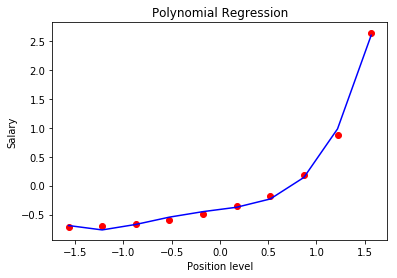

In [12]:
#Visualising the Polynomial Regression results
X_grid = np.arange(min(x_normal), max(x_normal), 0.1)#for better graph
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_normal,y_normal,color = 'red')
plt.plot(x_normal,y_pred_final,color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()